## <center>Malignant Comments Classifier Project</center>


The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

<b><center>Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.</center></b>

#### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#### Loading the train dataset

In [2]:
df_train = pd.read_csv('train.csv')

# looking for the dataset

df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
# Checking for the shape of the train dataset

df_train.shape

(159571, 8)

- The train dataset contains 1,59,571 rows and 8 columns including the target columns.

#### Loading the test dataset:

In [5]:
df_test = pd.read_csv('test.csv')

# looking for the dataset
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
# Checking for the shape of the test dataset

df_test.shape

(153164, 2)

- The test dataset contains 1,53,164 rows and 2 columns.

In [7]:
# Checking for the information of the train dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


- There are total 8 columns in the train dataset. 2 coulmns (id and comment_text) are of object datatype and all the target variables are of integer datatype (Boolean).

In [8]:
# Checking for the information of the test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


- The test dataset contains 2 columns and both are of object datatype.

In [9]:
# Checking if there is any missing values present in the train dataset

df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

- There is no missing values in the train dataset.

In [10]:
# Checking for the missing values in the test dataset

df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

- There is no missing values in the test dataset.

#### Data Visualization

In [11]:
target_columns = ['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']

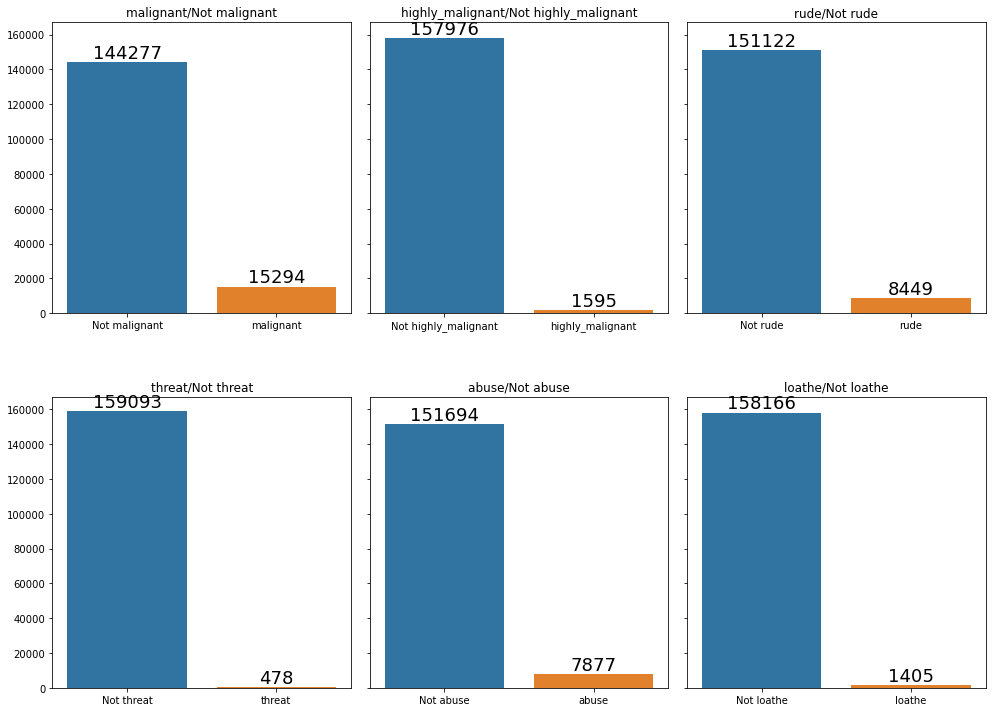

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=True)

i = -1
j = 0
for c in target_columns:
    plt.tight_layout(h_pad=5.0)
    if j % 3 == 0:
        i+=1
        j = 0
        ax=sns.barplot(['Not '+c,c], df_train[c].value_counts().values, ax=axes[i,j])
    else:
        ax=sns.barplot(['Not '+c,c], df_train[c].value_counts().values, ax=axes[i,j])

    #adding the text labels
    rects = ax.patches
    labels = df_train[c].value_counts().values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
    axes[i,j].set_title(c+'/Not '+c)
    j += 1

- The above graph shows that most of the data in the train dataset are non-offensive.

#### Checking for the Correlation

In [13]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


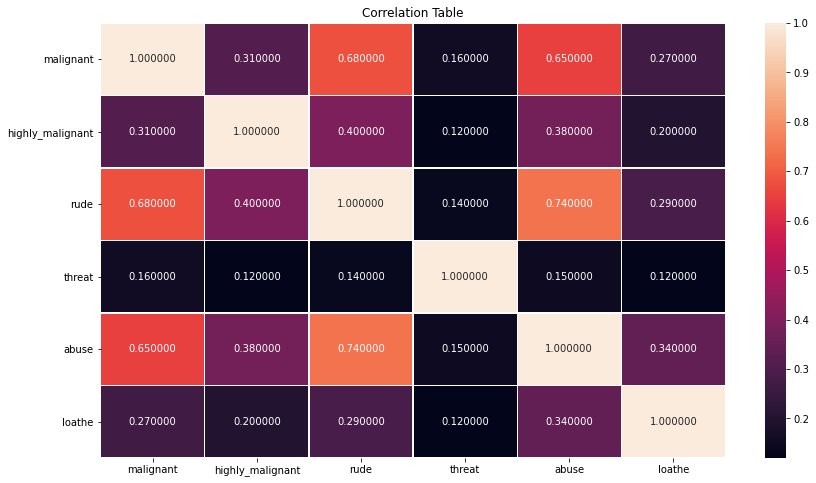

In [14]:
# Plotting heatmap

plt.figure(figsize=[14,8])
sns.heatmap(round(df_train.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

- 'rude' and 'abuse' is showing highest correlation approx 74%, this could be considered as strong bond.
- 'malignant' and 'rude' is showing correlation of approx 68%, this could be considered as strong bond.
- 'malignant' and 'abouse' is showing correlation of approx 65%, this could be considered as strong bond.


In [15]:
# Checking for the length of the comment and creating a new column for the same.

df_train['length']=df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [16]:
# Converting all the comments to lower case

df_train['comment_text']=df_train['comment_text'].str.lower()

df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [17]:
#Replacing email address with 'email'

df_train['comment_text']=df_train['comment_text'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')

#Replacing URLs with 'webaddress'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replacing money symbol with 'moneysymb'(£ can type with ALT key+156)
df_train['comment_text']=df_train['comment_text'].str.replace(r'£|\$','dollers')

#Replacing 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#Replacing whitespace between terms with a single space
df_train['comment_text']=df_train['comment_text'].str.replace(r'\s+',' ')

#Replacing number with 'numbr'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\d+(\.\d+)?','numbr')

#Removing punctuation
df_train['comment_text']=df_train['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Removing leading and trailing whitespace
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\s+|\s+?$',' ')

df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on imp...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,67


In [18]:
# Removing the stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_train['comment_text']=df_train['comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [19]:
#Checking for the length of the comments after removing the stopwords

df_train['clean_length']=df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,171
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,83
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


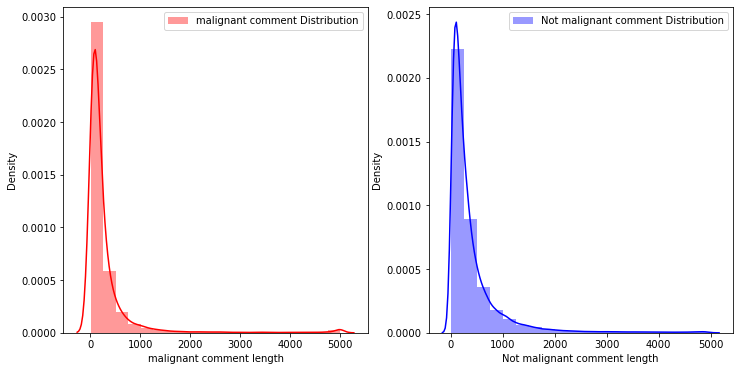

In [20]:
#comment distribution Before cleaning the comments

f,ax =plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_train[df_train['malignant']==1]['length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='red')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(df_train[df_train['malignant']==0]['length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='blue')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

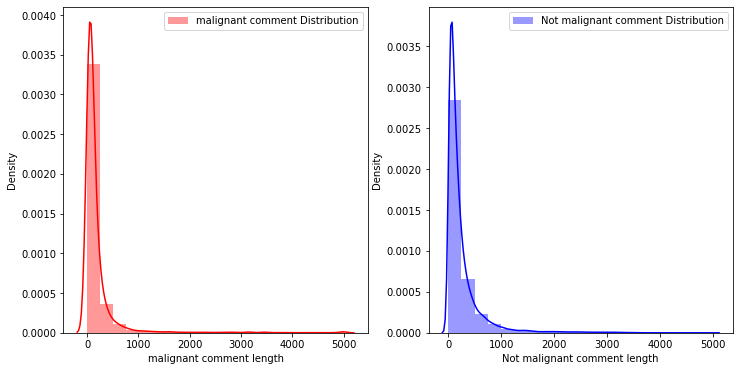

In [21]:
#comment distribution After cleaning the comments

f,ax =plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_train[df_train['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(df_train[df_train['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

#### Word cloud of malignant comments

In [22]:
import sys
print(sys.executable)

C:\Users\Manjunath Aparoji\anaconda3\python.exe


In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Manjunath' is not recognized as an internal or external command,
operable program or batch file.


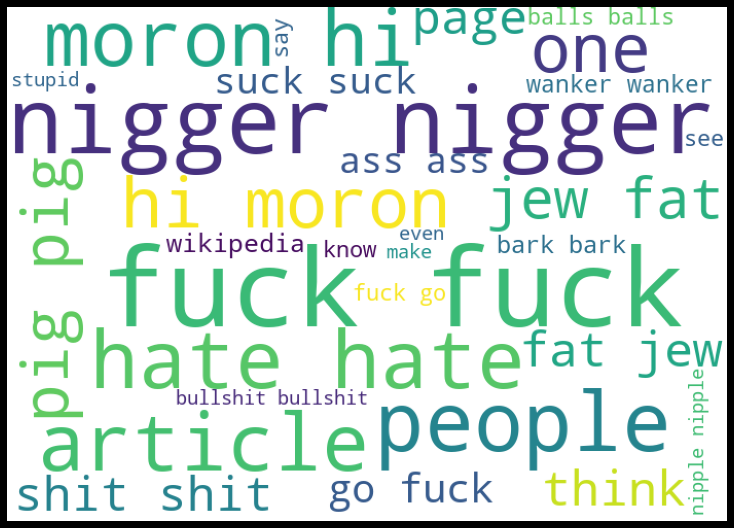

In [24]:
from wordcloud import WordCloud

malignant=df_train['comment_text'][df_train['malignant']==1]

malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word cloud of highly malignant comments

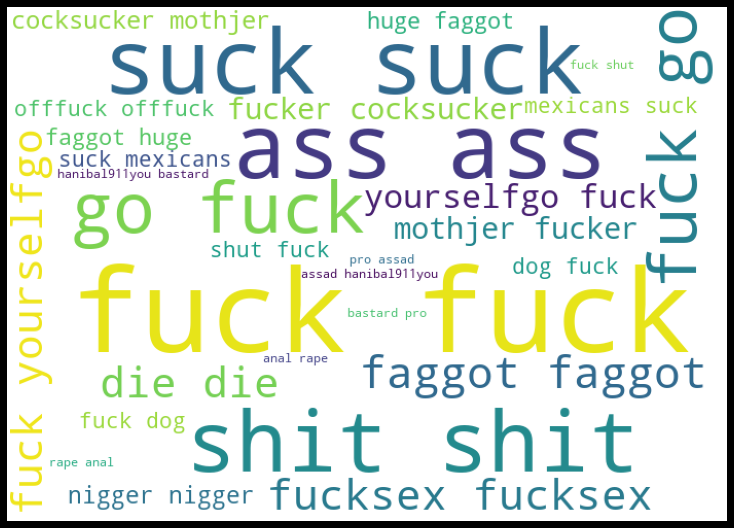

In [25]:
highly_malignant=df_train['comment_text'][df_train['highly_malignant']==1]

highly_malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(highly_malignant))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(highly_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word cloud of rude comments


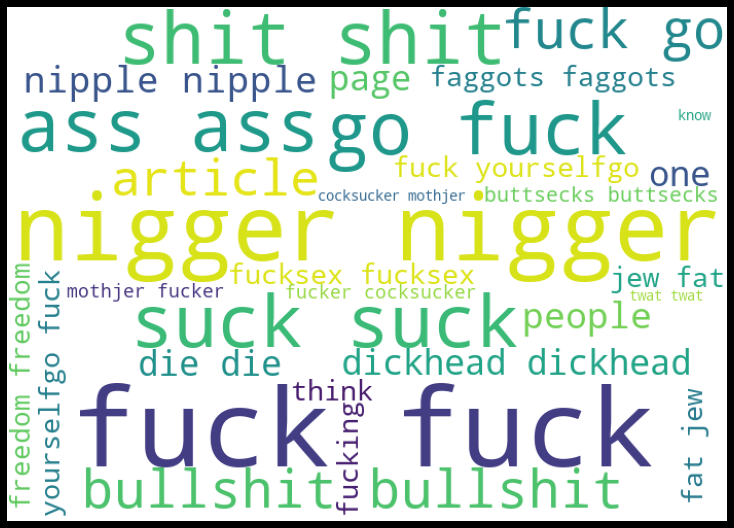

In [26]:
rude = df_train['comment_text'][df_train['rude']==1]

rude_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(rude))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word cloud of threat comments:

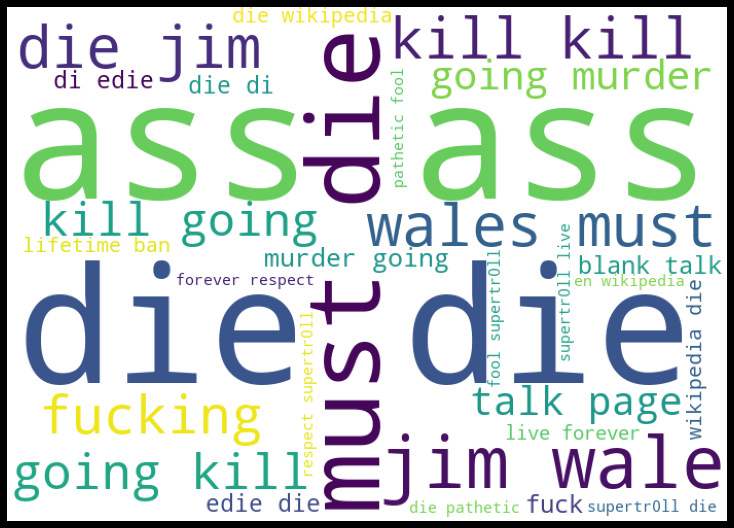

In [27]:
threat = df_train['comment_text'][df_train['threat']==1]

threat_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(threat))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word cloud of abuse comments:

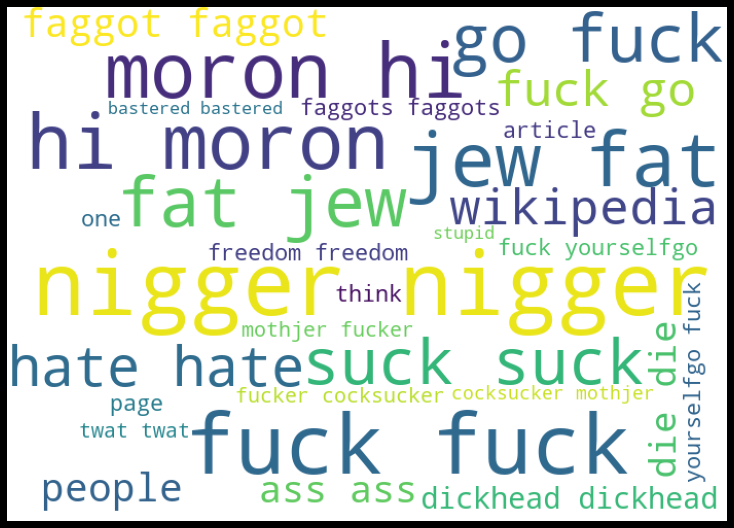

In [28]:
abuse = df_train['comment_text'][df_train['abuse']==1]

abuse_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(abuse))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word cloud of loathe comments:

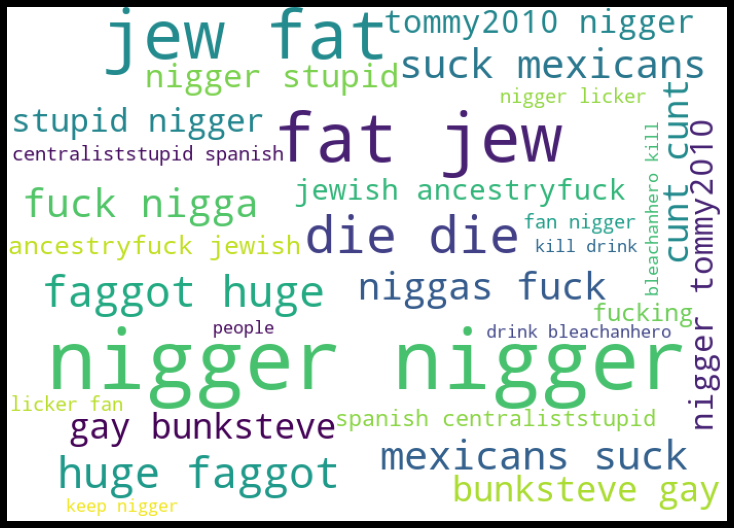

In [29]:
loathe = df_train['comment_text'][df_train['loathe']==1]

loathe_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(loathe))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word cloud of not malignant comments:

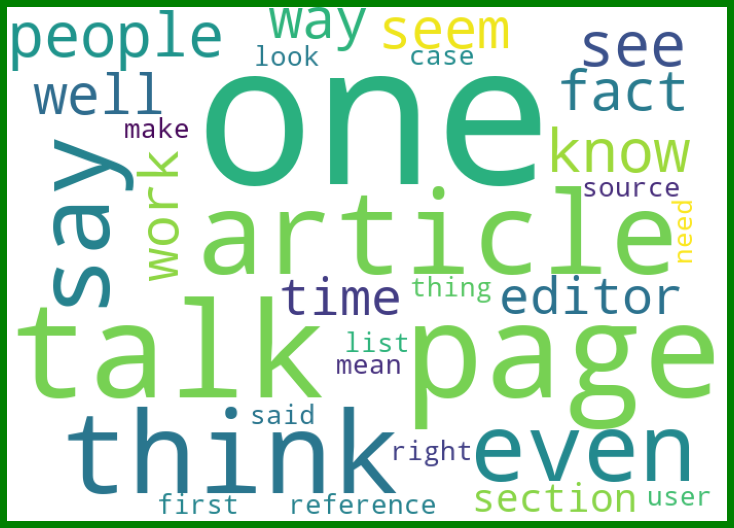

In [30]:
not_malignant=df_train['comment_text'][df_train['malignant']==0]

not_malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(not_malignant))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(not_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
target_data = df_train[target_columns]

df_train['bad'] =df_train[target_columns].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

#Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [33]:
#Converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [34]:
y=df_train['bad']

#Creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.25)

In [35]:
# Creating empty list

Model = []
score = []
cv_score = []
roc_score = []

#### 1. KNeighborsClassifier:

KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.9174040558493971
Cross_val_score= 0.9177983431914599
roc_auc_score=  0.608063110080496
classification_report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35840
           1       0.87      0.22      0.35      4053

    accuracy                           0.92     39893
   macro avg       0.89      0.61      0.65     39893
weighted avg       0.91      0.92      0.89     39893
 

Confusion Matrix
 [[35707   133]
 [ 3162   891]] 






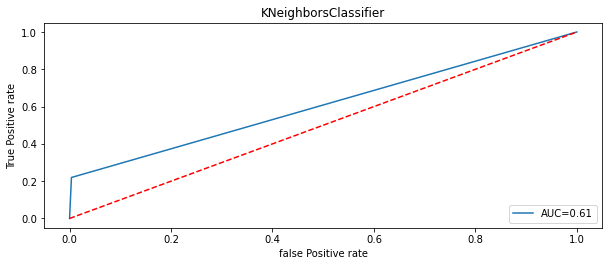

In [36]:
KNN=KNeighborsClassifier(n_neighbors=6)

Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)

pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)

score.append(AS*100)
sc=cross_val_score(KNN,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cv_score.append(sc*100)

false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc)
roc_score.append(roc_auc*100)

print('classification_report\n',classification_report(y_test,pre),'\n')

cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')

#Plotting AUC ROC Curve
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('KNeighborsClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

#### 2. LogisticRegression:

LogisticRegression()


Accuracy_score=  0.9560825207429875
Cross_val_score= 0.9556435680172933 

roc_auc_score=  0.8041054899534295 

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     35840
           1       0.93      0.61      0.74      4053

    accuracy                           0.96     39893
   macro avg       0.94      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893
 

Confusion Matrix
 [[35655   185]
 [ 1567  2486]] 






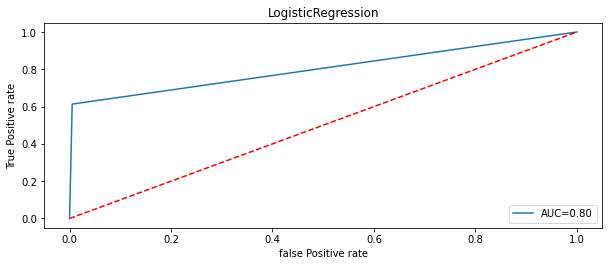

In [37]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)
#print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
roc_score.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('LogisticRegression')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

#### 3. DecisionTreeClassifier:

DecisionTreeClassifier()


Accuracy_score=  0.940365477652721
Cross_val_score= 0.9416497967066061 



roc_auc_score=  0.8289485363850853 

classification_report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     35840
           1       0.71      0.69      0.70      4053

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.83     39893
weighted avg       0.94      0.94      0.94     39893
 

Confusion Matrix
 [[34721  1119]
 [ 1260  2793]] 






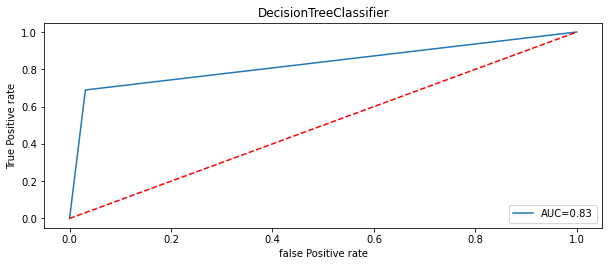

In [38]:
DT=DecisionTreeClassifier()
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
roc_score.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')

cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')

#Plotting AUC ROC Curve
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('DecisionTreeClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

##### 4. RandomForestClassifier:

RandomForestClassifier()


Accuracy_score=  0.9561577219060988
Cross_val_score= 0.9566525235143788 



roc_auc_score=  0.8395976456482852 

classification_report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     35840
           1       0.85      0.69      0.76      4053

    accuracy                           0.96     39893
   macro avg       0.91      0.84      0.87     39893
weighted avg       0.95      0.96      0.95     39893
 

Confusion Matrix
 [[35334   506]
 [ 1243  2810]] 






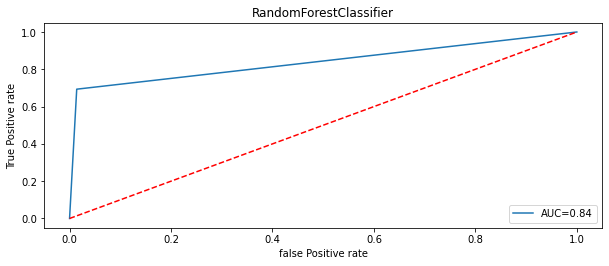

In [39]:
RF = RandomForestClassifier()
Model.append('RandomForestClassifier')
RF.fit(x_train,y_train)
print(RF)
pre=RF.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')

cv_score.append(sc*100)
print('\n')

false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')

roc_score.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')

cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('RandomForestClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [40]:
#Calculating the difference between accuracy score and cross validation score
difference = list(np.array(score) - np.array(cv_score))

# Creating dataframe
result = pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv_score,
                       'Difference':difference,'Roc_auc_curve':roc_score})
result

,Model,Accuracy_score,Cross_val_score,Difference,Roc_auc_curve
0,KNeighborsClassifier,91.740406,91.779834,-0.039429,60.806311
1,LogisticRegression,95.608252,95.564357,0.043895,80.410549
2,DecisionTreeClassifier,94.036548,94.164980,-0.128432,82.894854
3,RandomForestClassifier,95.615772,95.665252,-0.049480,83.959765


- From the above table, we found that the minimum difference between the accuracy score and cross validation score is for RandomForestClassifier. So, the best fit model for our project is RandomForestClassifier.

In [41]:
# Saving the final model
import joblib
filename = 'malignant_comment_classifier.pkl'
joblib.dump(RF, open(filename, 'wb'))

In [42]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [43]:
#Predicting the malignant comment of the test dataset

predict = RF.predict(test_data)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
#Loading the saved model
final_model = joblib.load(filename)

In [45]:
result_test = pd.DataFrame(final_model.predict(test_data))

result_test.head()

,0
0,0
1,0
2,0
3,1
4,0


In [48]:
#Saving the predicted result of the test dataset in csv
result_test.to_csv(r'C:\Users\Manjunath Aparoji\OneDrive\Desktop\Malignant-Comments-Classifier.csv')